In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 이미지 처리
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
# json 파일 처리
import json

In [4]:
# 파일 존재 여부 확인용
import os

In [5]:
# 모델
from tensorflow import keras

In [6]:
from sklearn.metrics import confusion_matrix

# 변수 목록

In [7]:
os.chdir('/content/drive/MyDrive/[perst]데이터셋/MachineLearningProject/02_Fashion Type Classification Model')

In [8]:
test_dir_name = "./Dataset/Train-Test/Female/Test/"

img_width = 200
img_height = 200

model_dir_name = './Model/' # 학습 모델이 저장될 디렉토리명

In [9]:
label_name = ['Traditional',
              'Manish',
              'Feminine',
              'Ethnic',
              'Contemporary',
              'Natural',
              'Gender-Fluid',
              'Sporty',
              'Subculture',
              'Casual']

# 평가할 모델의 버전 지정

In [10]:
model_path = model_dir_name + 'fashion_classification_female_0124_02.keras'

# Test 데이터 불러오기

In [11]:
x_test = []
y_test = []

for i in range(0, 2001):
    img_path = test_dir_name + "Image/" + str(i) + ".jpg"
    label_path = test_dir_name + "Json/" + str(i) + ".json"

    if not os.path.isfile(img_path):
        continue
    if not os.path.isfile(label_path):
        continue

    # 이미지 파일 로드
    img_file = cv2.imread(img_path)
    if img_file is None:
        print(str(i) + ".jpg File Load Failed!!")
        break

    # json 파일 로드
    with open(label_path, "r") as loadfile:
      label_file = json.load(loadfile)
    if label_file is None:
        print(str(i) + ".json File Load Failed!!")
        break


    x_test.append(img_file)
    y_test.append(label_file)


    if len(y_test)%500 == 0: # 진행도 확인용
        print(str(len(y_test)) + "개 파일 읽기 완료")


print("Complete")


500개 파일 읽기 완료
1000개 파일 읽기 완료
1500개 파일 읽기 완료
2000개 파일 읽기 완료
Complete


# 학습을 위해 X,Y 데이터 형식 변경

In [12]:
x_test = np.array(x_test)
x_test.shape

(2000, 200, 200, 3)

In [13]:
y_test_ori = y_test[:]
y_test = []

for item in y_test_ori:
  num = label_name.index(item['Labeling'])
  y_test.append(num)

print(y_test[0])

8


In [14]:
y_test = np.array(y_test)
y_test.shape

(2000,)

In [15]:
y_test = y_test.astype('uint8')
y_test.dtype

dtype('uint8')

# Test 데이터 통계

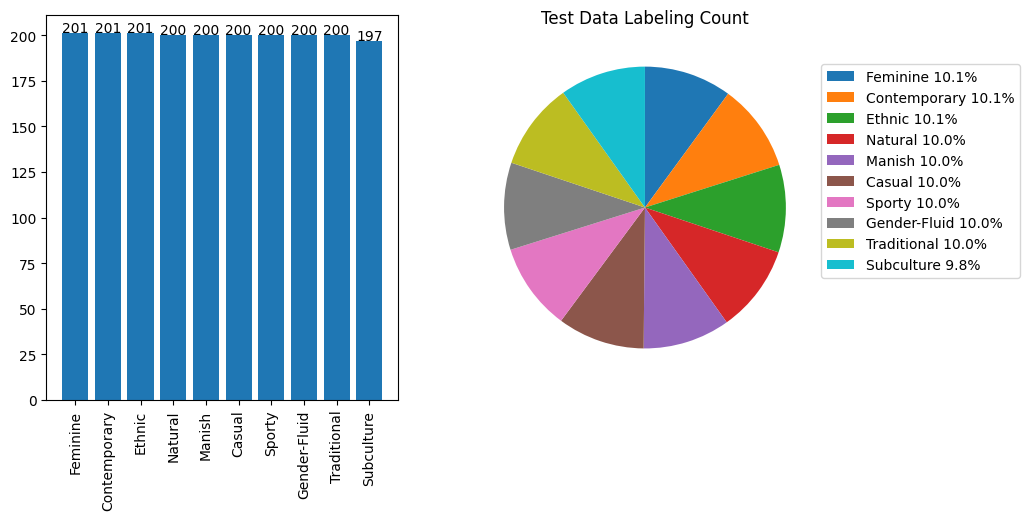

In [16]:
# 라벨 개수 카운트
label_count = {}

for item in y_test:
  label = label_name[item]
  if label not in label_count: # 해당 키가 없을 경우
    label_count[label] = 1
  else:
    label_count[label] = label_count[label]+1


# 내림차순 정렬
label_count = sorted(label_count.items(), key= lambda item:item[1], reverse=True)

label_count_labels = []
label_count_values = []

for item in label_count:
    label_count_labels.append(item[0])
    label_count_values.append(item[1])


# 파이 차트를 위한 라벨링 생성
total = np.sum(label_count_values)
label_count_labels_ratio = []

for i in range(0, len(label_count_labels)):
    ratio = (label_count_values[i]/total) * 100

    new_label = label_count_labels[i] + (' %.1f%%' % ratio)
    label_count_labels_ratio.append(new_label)


# 차트 그리기
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
barplot = plt.bar(label_count_labels, label_count_values)
plt.xticks(rotation=90)

for i, j in enumerate(barplot) :
    plt.text(i, j.get_height() + 0.5, label_count_values[i], ha = 'center')

plt.subplot(1, 2, 2)
plt.pie(label_count_values, startangle=90, counterclock=False)
plt.legend(label_count_labels_ratio, loc=(1.0, 0.3))

plt.title("Test Data Labeling Count")
plt.show()

# 모델 예측 진행

In [17]:
saved_model = keras.models.load_model(model_path)
saved_model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_72 (Conv2D)          (None, 200, 200, 64)      4864      
                                                                 
 dropout_63 (Dropout)        (None, 200, 200, 64)      0         
                                                                 
 conv2d_73 (Conv2D)          (None, 200, 200, 64)      36928     
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 100, 100, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_74 (Conv2D)          (None, 100, 100, 128)     73856     
                                                          

In [18]:
 saved_model.evaluate(x_test, y_test)

63/63 [==============================] - 700s 11s/step - loss: 1.9960 - sparse_categorical_accuracy: 0.3225


[1.9960013628005981, 0.32249999046325684]

# 상세 분류 결과 평가

In [20]:
y_true = y_test[:]

y_pred = saved_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

print(y_pred.shape)

63/63 [==============================] - 710s 11s/step
(2000,)


In [21]:
y_pred[0]

5

## 분류 결과 개수 시각화

In [22]:
# 라벨 개수 카운트
true_label_count = {}
pred_label_count = {}

for item in y_true:
  label = label_name[item]
  if label not in true_label_count: # 해당 키가 없을 경우
    true_label_count[label] = 1
  else:
    true_label_count[label] = true_label_count[label]+1

for item in y_pred:
  label = label_name[item]
  if label not in pred_label_count: # 해당 키가 없을 경우
    pred_label_count[label] = 1
  else:
    pred_label_count[label] = pred_label_count[label]+1


# 내림차순 정렬
true_label_count = sorted(true_label_count.items(), key= lambda item:item[1], reverse=True)

true_label_count_labels = []
true_label_count_values = []

for item in true_label_count:
    true_label_count_labels.append(item[0])
    true_label_count_values.append(item[1])

pred_label_count = sorted(pred_label_count.items(), key= lambda item:item[1], reverse=True)

pred_label_count_labels = []
pred_label_count_values = []

for item in pred_label_count:
    pred_label_count_labels.append(item[0])
    pred_label_count_values.append(item[1])


# 파이 차트를 위한 라벨링 생성
true_total = np.sum(true_label_count_values)
true_label_count_labels_ratio = []

for i in range(0, len(true_label_count_labels)):
    ratio = (true_label_count_values[i]/true_total) * 100

    true_new_label = true_label_count_labels[i] + (' %.1f%%' % ratio)
    true_label_count_labels_ratio.append(true_new_label)

pred_total = np.sum(pred_label_count_values)
pred_label_count_labels_ratio = []

for i in range(0, len(pred_label_count_labels)):
    ratio = (pred_label_count_values[i]/total) * 100

    pred_new_label = pred_label_count_labels[i] + (' %.1f%%' % ratio)
    pred_label_count_labels_ratio.append(pred_new_label)


print("Complete")

Complete


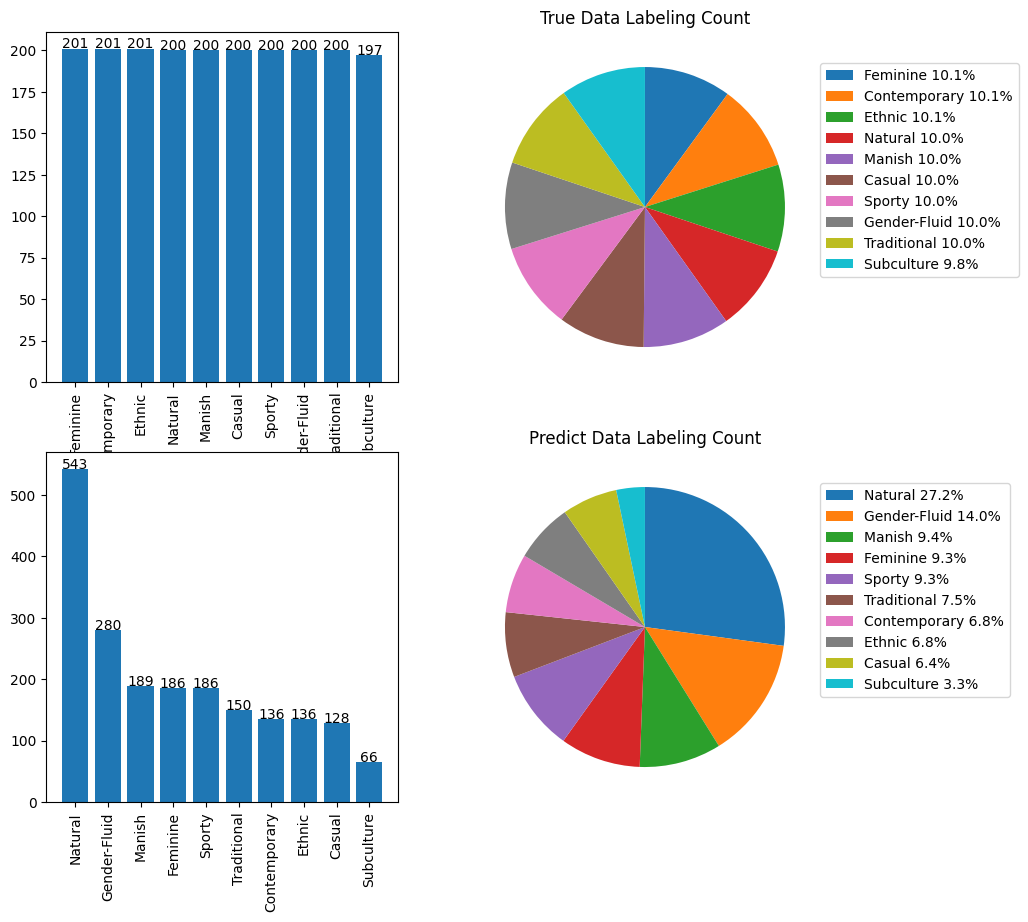

In [27]:
# 차트 그리기
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
true_barplot = plt.bar(true_label_count_labels, true_label_count_values)
plt.xticks(rotation=90)

for i, j in enumerate(true_barplot) :
    plt.text(i, j.get_height() + 0.5, true_label_count_values[i], ha = 'center')

plt.subplot(2, 2, 2)
plt.pie(true_label_count_values, startangle=90, counterclock=False)
plt.legend(true_label_count_labels_ratio, loc=(1.0, 0.3))

plt.title("True Data Labeling Count")


plt.subplot(2, 2, 3)
pred_barplot = plt.bar(pred_label_count_labels, pred_label_count_values)
plt.xticks(rotation=90)

for i, j in enumerate(pred_barplot) :
    plt.text(i, j.get_height() + 0.5, pred_label_count_values[i], ha = 'center')

plt.subplot(2, 2, 4)
plt.pie(pred_label_count_values, startangle=90, counterclock=False)
plt.legend(pred_label_count_labels_ratio, loc=(1.0, 0.3))

plt.title("Predict Data Labeling Count")

plt.show()

# Confusion Matrix

In [28]:
matrix = confusion_matrix(y_true, y_pred)
print(matrix)

[[ 54  18  13  18  17  37  23   8   4   8]
 [ 16  73   5   7  11  28  36   7   3  14]
 [  9   1  52  14   8  77  21  10   8   1]
 [ 11   3  12  42  10  85  12  14   5   7]
 [ 10  13  29  11  41  53  17  14   4   9]
 [  8   9  17  10  16 119  10   7   2   2]
 [ 10  34   9   3   5  28  89   8   2  12]
 [  9  11  14   6   7  29  21  91   6   6]
 [ 14  12  19  17   9  45  15  19  31  16]
 [  9  15  16   8  12  42  36   8   1  53]]


Text(0.5, 1.0, 'Confusion Matrix')

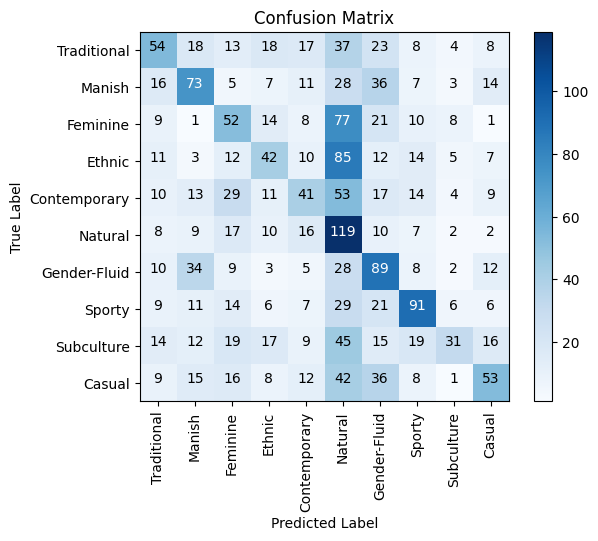

In [40]:
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

tick_marks = np.arange(len(label_name))
plt.xticks(tick_marks, label_name, rotation=90)
plt.yticks(tick_marks, label_name)

for i in range(matrix.shape[0]):
  for j in range(matrix.shape[1]):
    plt.text(j, i, matrix[i, j], horizontalalignment="center", color="white" if matrix[i, j] > matrix.max()/2 else "black")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")